In [12]:
import seaborn as sns

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from osprey.config import Config

## Get Trial Database

In [38]:
config = Config('/home/robert/Research/hyperparamopt/Trial Data/DHFR/Random-GMRQ-2/alpha_angle.yaml')
df = config.trial_results()

Loading config file:     /home/robert/Research/hyperparamopt/Trial Data/DHFR/Random-GMRQ-2/alpha_angle.yaml...
Loading trials database: sqlite:///osprey-trials.db...


In [39]:
print(df.shape)
df.head()

(1516, 17)


,completed,config_sha1,elapsed,host,id,mean_test_score,mean_train_score,n_test_samples,n_train_samples,parameters,project_name,started,status,test_scores,traceback,train_scores,user
0,2017-08-03 20:16:52.451687,11d05ee0f2efe3233a58a40ac81bbb9962bf882a,1970-01-01 00:02:15.233066,compute249.bc4.acrc.priv,2,2.613855,2.922517,"[75000, 75000, 75000, 75000, 75000]","[75000, 75000, 75000, 75000, 75000]","{'cluster__reassignment_ratio': 0.01, 'cluster...",alpha_angle,2017-08-03 20:14:37.218621,SUCCEEDED,"[2.7929254738960707, 2.806366141062694, 2.6499...",None,"[2.8238005249605154, 2.870721463825274, 2.9884...",ra15808
1,2017-08-03 20:32:19.317085,11d05ee0f2efe3233a58a40ac81bbb9962bf882a,1970-01-01 00:17:41.918205,compute249.bc4.acrc.priv,3,2.561150,2.970864,"[75000, 75000, 75000, 75000, 75000]","[75000, 75000, 75000, 75000, 75000]","{'cluster__reassignment_ratio': 0.01, 'cluster...",alpha_angle,2017-08-03 20:14:37.398880,SUCCEEDED,"[2.7309232422787275, 2.5163258459570557, 2.645...",None,"[2.96773553090778, 2.969495071361183, 2.995966...",ra15808
2,2017-08-03 20:28:36.104540,11d05ee0f2efe3233a58a40ac81bbb9962bf882a,1970-01-01 00:13:58.667505,compute249.bc4.acrc.priv,4,2.878763,2.992912,"[75000, 75000, 75000, 75000, 75000]","[75000, 75000, 75000, 75000, 75000]","{'cluster__reassignment_ratio': 0.01, 'cluster...",alpha_angle,2017-08-03 20:14:37.437035,SUCCEEDED,"[2.948540113694251, 2.632606230422432, 2.87014...",None,"[2.993834214901289, 2.978360161399329, 2.99909...",ra15808
3,2017-08-03 20:22:28.222725,11d05ee0f2efe3233a58a40ac81bbb9962bf882a,1970-01-01 00:07:50.785734,compute249.bc4.acrc.priv,5,2.388471,2.971272,"[75000, 75000, 75000, 75000, 75000]","[75000, 75000, 75000, 75000, 75000]","{'cluster__reassignment_ratio': 0.01, 'cluster...",alpha_angle,2017-08-03 20:14:37.436991,SUCCEEDED,"[1.8985418806233798, 1.859573749968411, 2.5134...",None,"[2.9877866168480036, 2.9321628078314492, 2.997...",ra15808
4,2017-08-03 20:39:29.160628,11d05ee0f2efe3233a58a40ac81bbb9962bf882a,1970-01-01 00:24:51.610195,compute249.bc4.acrc.priv,6,2.854033,2.987659,"[75000, 75000, 75000, 75000, 75000]","[75000, 75000, 75000, 75000, 75000]","{'cluster__reassignment_ratio': 0.01, 'cluster...",alpha_angle,2017-08-03 20:14:37.550433,SUCCEEDED,"[2.8355832551294116, 2.797077185532208, 2.9419...",None,"[2.988991097899673, 2.988911714909688, 2.96883...",ra15808


## Calculate variance for scores


In [40]:
df['test_error'] = df.loc[:, 'test_scores'].apply(lambda x: np.array(x).std())

In [41]:
df.head()

,completed,config_sha1,elapsed,host,id,mean_test_score,mean_train_score,n_test_samples,n_train_samples,parameters,project_name,started,status,test_scores,traceback,train_scores,user,test_error
0,2017-08-03 20:16:52.451687,11d05ee0f2efe3233a58a40ac81bbb9962bf882a,1970-01-01 00:02:15.233066,compute249.bc4.acrc.priv,2,2.613855,2.922517,"[75000, 75000, 75000, 75000, 75000]","[75000, 75000, 75000, 75000, 75000]","{'cluster__reassignment_ratio': 0.01, 'cluster...",alpha_angle,2017-08-03 20:14:37.218621,SUCCEEDED,"[2.7929254738960707, 2.806366141062694, 2.6499...",None,"[2.8238005249605154, 2.870721463825274, 2.9884...",ra15808,0.334112
1,2017-08-03 20:32:19.317085,11d05ee0f2efe3233a58a40ac81bbb9962bf882a,1970-01-01 00:17:41.918205,compute249.bc4.acrc.priv,3,2.561150,2.970864,"[75000, 75000, 75000, 75000, 75000]","[75000, 75000, 75000, 75000, 75000]","{'cluster__reassignment_ratio': 0.01, 'cluster...",alpha_angle,2017-08-03 20:14:37.398880,SUCCEEDED,"[2.7309232422787275, 2.5163258459570557, 2.645...",None,"[2.96773553090778, 2.969495071361183, 2.995966...",ra15808,0.267441
2,2017-08-03 20:28:36.104540,11d05ee0f2efe3233a58a40ac81bbb9962bf882a,1970-01-01 00:13:58.667505,compute249.bc4.acrc.priv,4,2.878763,2.992912,"[75000, 75000, 75000, 75000, 75000]","[75000, 75000, 75000, 75000, 75000]","{'cluster__reassignment_ratio': 0.01, 'cluster...",alpha_angle,2017-08-03 20:14:37.437035,SUCCEEDED,"[2.948540113694251, 2.632606230422432, 2.87014...",None,"[2.993834214901289, 2.978360161399329, 2.99909...",ra15808,0.128634
3,2017-08-03 20:22:28.222725,11d05ee0f2efe3233a58a40ac81bbb9962bf882a,1970-01-01 00:07:50.785734,compute249.bc4.acrc.priv,5,2.388471,2.971272,"[75000, 75000, 75000, 75000, 75000]","[75000, 75000, 75000, 75000, 75000]","{'cluster__reassignment_ratio': 0.01, 'cluster...",alpha_angle,2017-08-03 20:14:37.436991,SUCCEEDED,"[1.8985418806233798, 1.859573749968411, 2.5134...",None,"[2.9877866168480036, 2.9321628078314492, 2.997...",ra15808,0.432412
4,2017-08-03 20:39:29.160628,11d05ee0f2efe3233a58a40ac81bbb9962bf882a,1970-01-01 00:24:51.610195,compute249.bc4.acrc.priv,6,2.854033,2.987659,"[75000, 75000, 75000, 75000, 75000]","[75000, 75000, 75000, 75000, 75000]","{'cluster__reassignment_ratio': 0.01, 'cluster...",alpha_angle,2017-08-03 20:14:37.550433,SUCCEEDED,"[2.8355832551294116, 2.797077185532208, 2.9419...",None,"[2.988991097899673, 2.988911714909688, 2.96883...",ra15808,0.048353


## All ordered results

In [42]:
df_ordered = df.sort_values(by='mean_test_score',ascending=False)
df_ordered['rank'] = np.arange(df_ordered.shape[0])+1

In [43]:
df_ordered.head()

,completed,config_sha1,elapsed,host,id,mean_test_score,mean_train_score,n_test_samples,n_train_samples,parameters,project_name,started,status,test_scores,traceback,train_scores,user,test_error,rank
317,2017-08-03 20:56:21.539207,11d05ee0f2efe3233a58a40ac81bbb9962bf882a,1970-01-01 00:17:12.678006,compute249.bc4.acrc.priv,340,2.969180,2.997417,"[75000, 75000, 75000, 75000, 75000]","[75000, 75000, 75000, 75000, 75000]","{'cluster__reassignment_ratio': 0.01, 'cluster...",alpha_angle,2017-08-03 20:39:08.861201,SUCCEEDED,"[2.924020334874508, 2.9698606568357997, 2.9831...",None,"[2.9965153906667426, 2.9945713180323463, 2.998...",ra15808,0.023263,1
1433,2017-08-04 01:07:13.823609,76258463a1f2cd563e7c5d77ccec29cd76e6ba29,1970-01-01 00:40:27.855410,compute427.bc4.acrc.priv,1513,2.967532,2.997783,"[75000, 75000, 75000, 75000, 75000]","[75000, 75000, 75000, 75000, 75000]","{'cluster__reassignment_ratio': 0.01, 'cluster...",kappa_angle,2017-08-04 00:26:45.968199,SUCCEEDED,"[2.9747090975733688, 2.956909241153384, 2.9847...",None,"[2.9949107356491385, 2.998797693837137, 2.9991...",ra15808,0.014431,2
933,2017-08-03 23:14:27.307682,11d05ee0f2efe3233a58a40ac81bbb9962bf882a,1970-01-01 01:08:07.849338,compute427.bc4.acrc.priv,994,2.966971,2.996771,"[75000, 75000, 75000, 75000, 75000]","[75000, 75000, 75000, 75000, 75000]","{'cluster__reassignment_ratio': 0.01, 'cluster...",alpha_angle,2017-08-03 22:06:19.458344,SUCCEEDED,"[2.986630876845032, 2.9609057675592125, 2.9206...",None,"[2.9924662800496753, 2.9969213988757035, 2.998...",ra15808,0.025578,3
1469,2017-08-04 00:57:21.990251,76258463a1f2cd563e7c5d77ccec29cd76e6ba29,1970-01-01 00:04:41.541245,compute427.bc4.acrc.priv,1554,2.965790,2.990738,"[75000, 75000, 75000, 75000, 75000]","[75000, 75000, 75000, 75000, 75000]","{'cluster__reassignment_ratio': 0.01, 'cluster...",kappa_angle,2017-08-04 00:52:40.449006,SUCCEEDED,"[2.9632493672161226, 2.9543186829265533, 2.986...",None,"[2.99880160038949, 2.9897071784365, 2.98437574...",ra15808,0.011501,4
1008,2017-08-03 22:21:30.438093,11d05ee0f2efe3233a58a40ac81bbb9962bf882a,1970-01-01 00:03:24.063997,compute249.bc4.acrc.priv,1069,2.965008,2.995223,"[75000, 75000, 75000, 75000, 75000]","[75000, 75000, 75000, 75000, 75000]","{'cluster__reassignment_ratio': 0.01, 'cluster...",alpha_angle,2017-08-03 22:18:06.374096,SUCCEEDED,"[2.951007543461104, 2.9585031051238304, 2.9578...",None,"[2.997938376605804, 2.993601788874842, 2.99277...",ra15808,0.011704,5


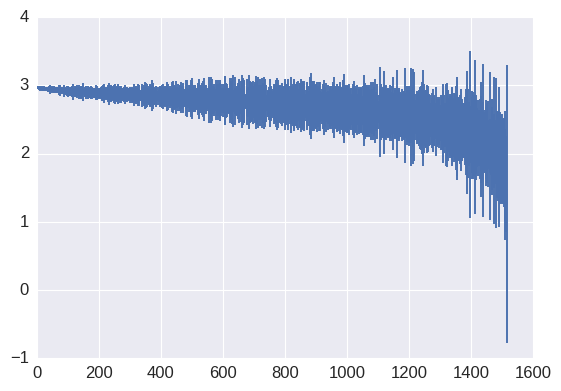

In [44]:
with sns.plotting_context('paper', font_scale=1.5):
    fig, ax = plt.subplots(1)
    ax.errorbar(x=df_ordered['rank'], y=df_ordered['mean_test_score'], yerr=df_ordered['test_error'])
    